# **Step 1 : Importing necessary libaries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
!pip install chardet
import chardet

 **Loading training & testing dataset**



In [ ]:
with open('test.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
df = pd.read_csv("test.csv",encoding=encoding)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
with open('train.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
df2 = pd.read_csv("train.csv",encoding=encoding)

In [ ]:
df.shape,df2.shape

((1459, 80), (1460, 81))

In [ ]:
print(df2['SalePrice'])

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


# **Step 2 : Exploratory Data Analysis(EDA)**


*   Dealing with missing values
*   Dealing with outliers
*   Data Visualization  





In [ ]:
cols = df.columns
cols2 =df2.columns
for i in cols:
    if df[i].isnull().mean()*100>80:
      df.drop(i,axis=1,inplace=True)

for i in cols2:
  if df2[i].isnull().mean()*100>80:
      df2.drop(i,axis=1,inplace=True)

In [ ]:
print(df.shape,df2.shape)

(1459, 76) (1460, 77)


In [ ]:
df[['MasVnrType','FireplaceQu']].isnull().sum()

MasVnrType     894
FireplaceQu    730
dtype: int64

In [ ]:
df2[['MasVnrType','FireplaceQu']].isnull().sum()

MasVnrType     872
FireplaceQu    690
dtype: int64

In [ ]:
cols =df.columns
cols2 =df2.columns
cat = [i for i in cols if df[i].dtype=='object']
cat2 = [i for i in cols2 if df2[i].dtype=='object']
num = [i for i in cols if df[i].dtype== 'int64' or df[i].dtype=='float64']
num2 = [i for i in cols2 if df2[i].dtype== 'int64' or df2[i].dtype=='float64']

In [ ]:
len(cat2),len(cat),len(num2),len(num)

(39, 39, 38, 37)

*   **Filling missing values in categorical columns with mode imputation where only <10% data is missing**



In [ ]:
for i in cat:
  if df[i].isnull().mean()*100<10:
    df[i].fillna(df[i].mode()[0],inplace=True)

for i in cat2:
  if df2[i].isnull().mean()*100<10:
    df2[i].fillna(df2[i].mode()[0],inplace=True)

In [ ]:
df2[num2].isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
S

*   **Filling missing values in rest categorical columns with most frequent values**

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[cat] = imputer.fit_transform(df[cat])
df2[cat2] = imputer.fit_transform(df2[cat2])

In [ ]:
df2[cat2].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

*   **Visualizing the relationship between Saleprice & Categorical variables**



<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


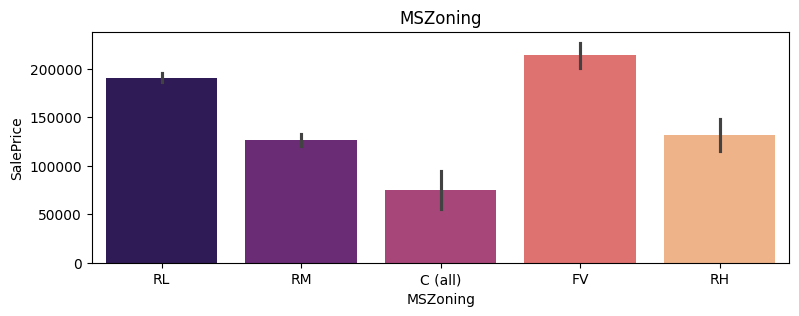

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


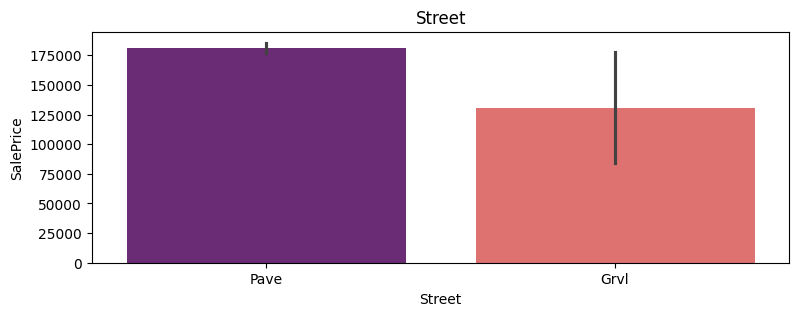

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


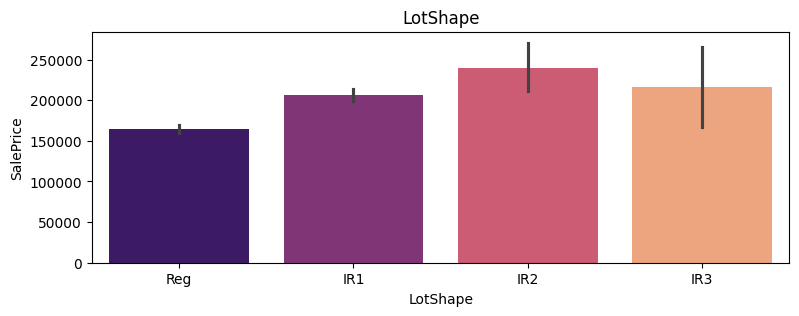

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


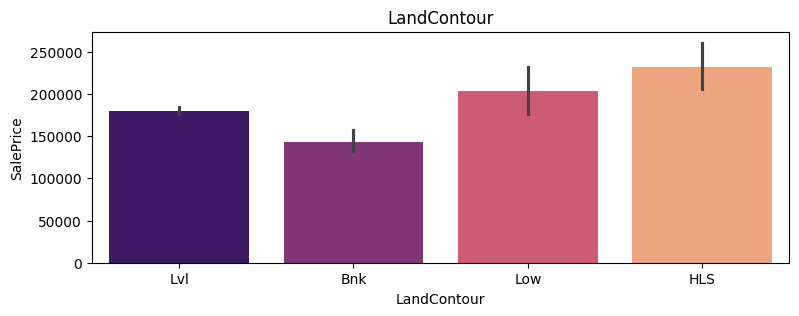

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


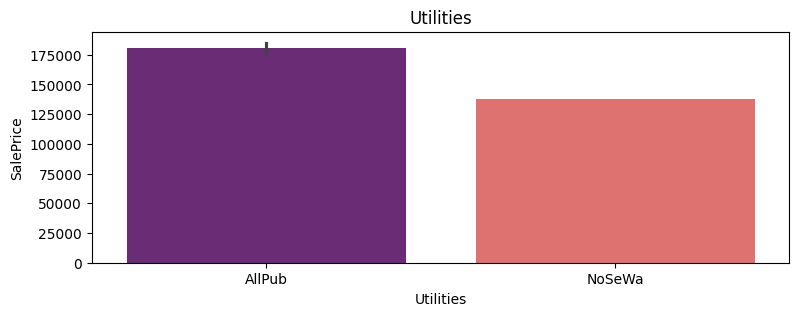

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


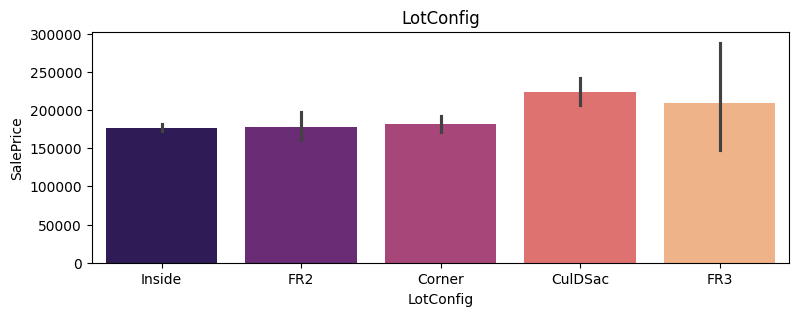

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


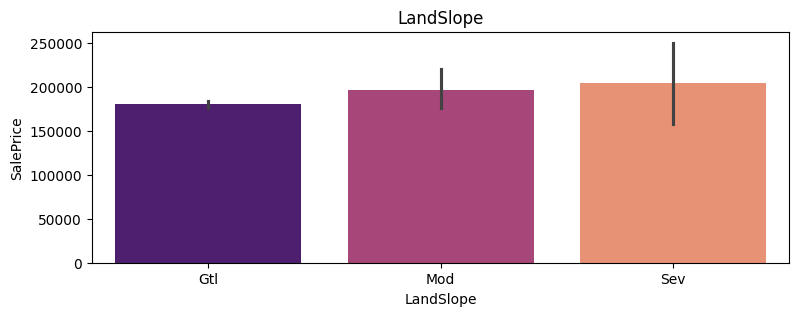

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


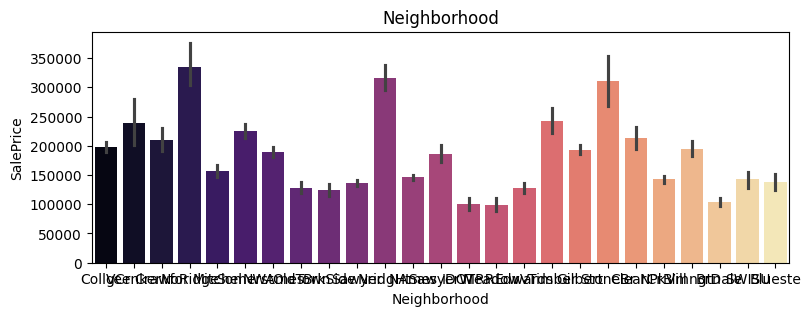

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


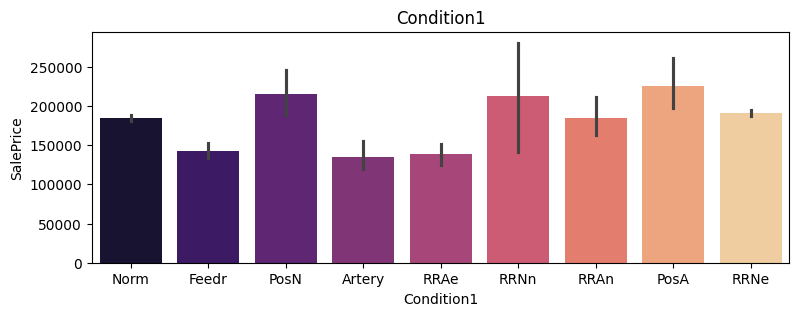

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


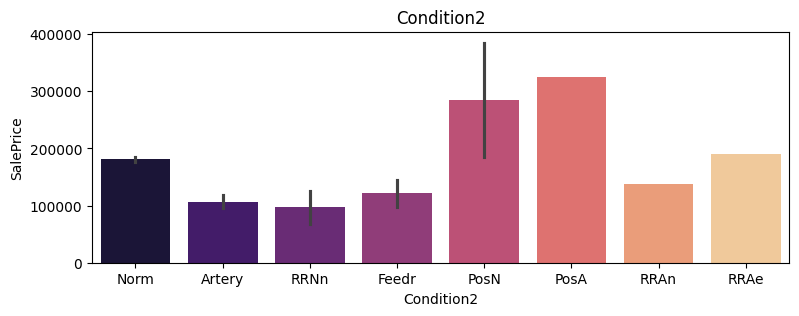

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


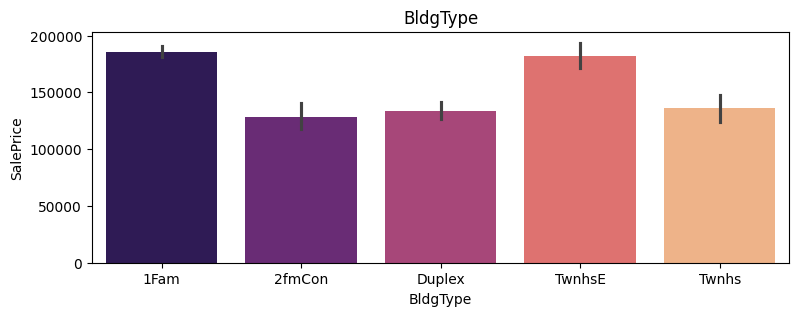

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


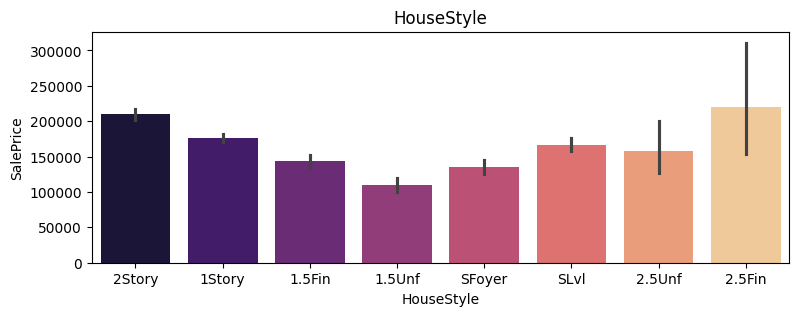

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


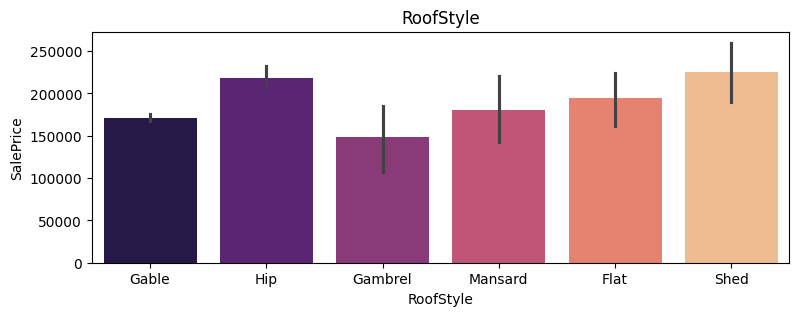

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


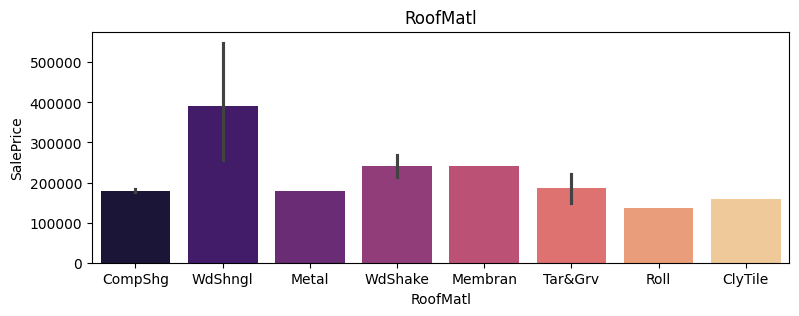

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


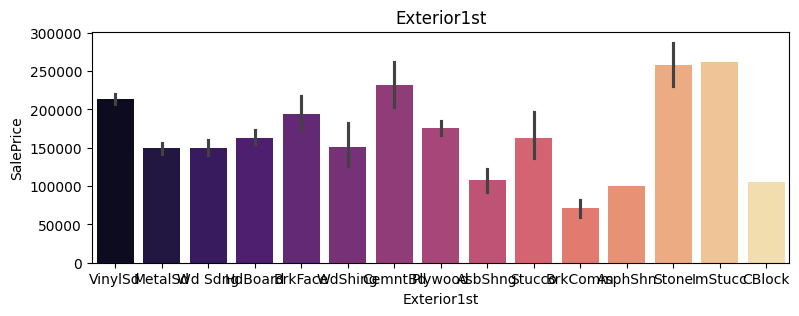

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


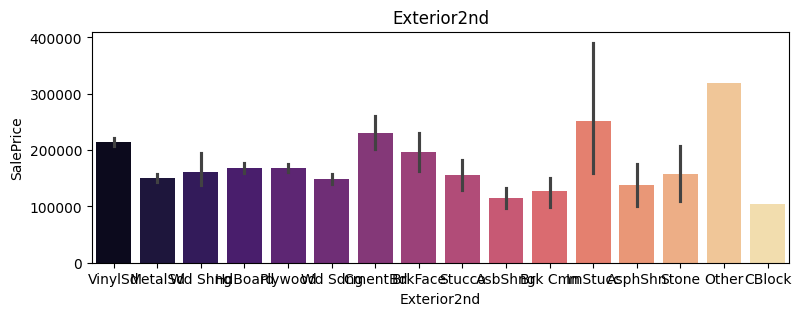

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


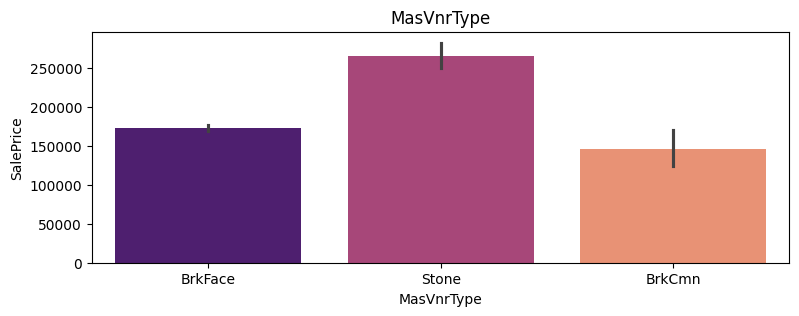

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


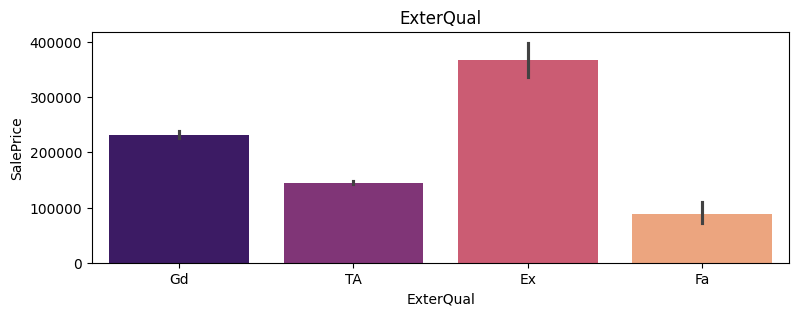

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


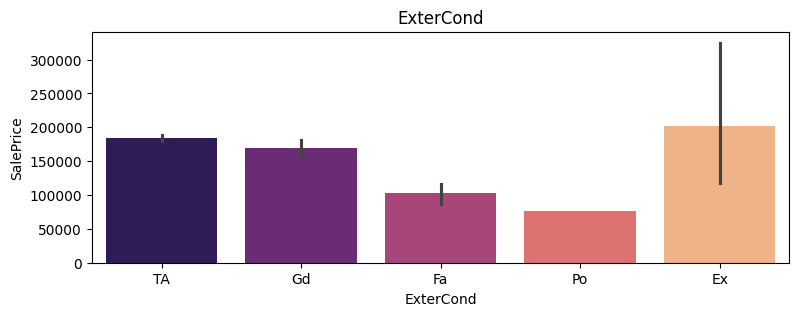

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


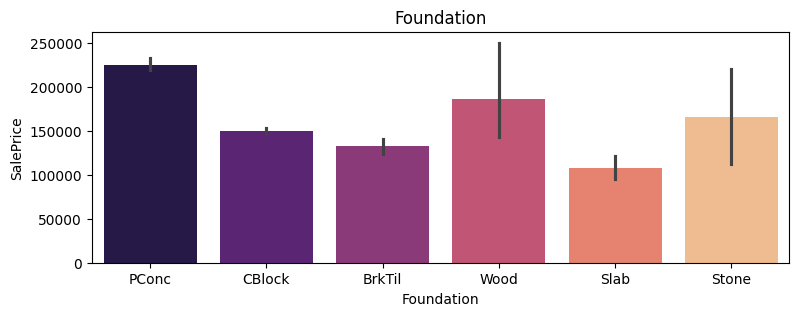

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


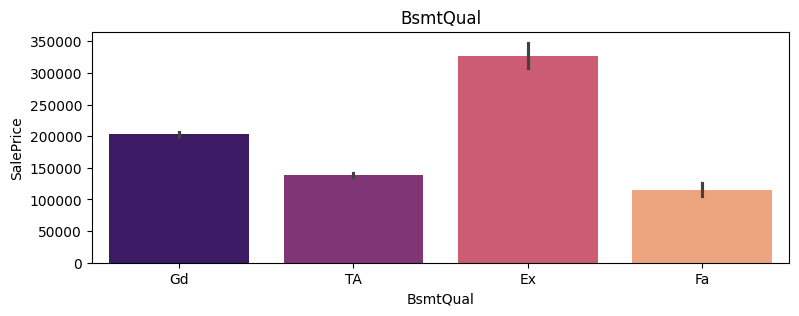

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


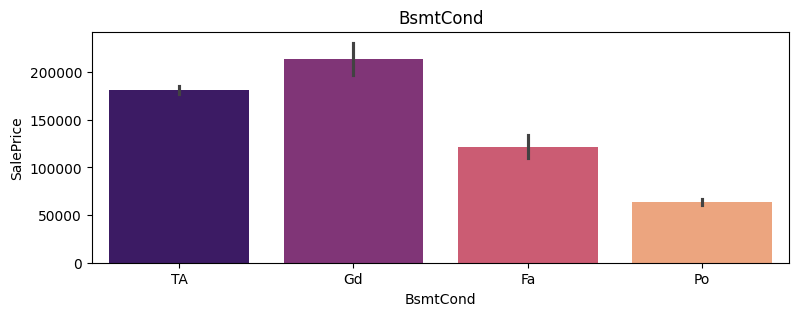

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


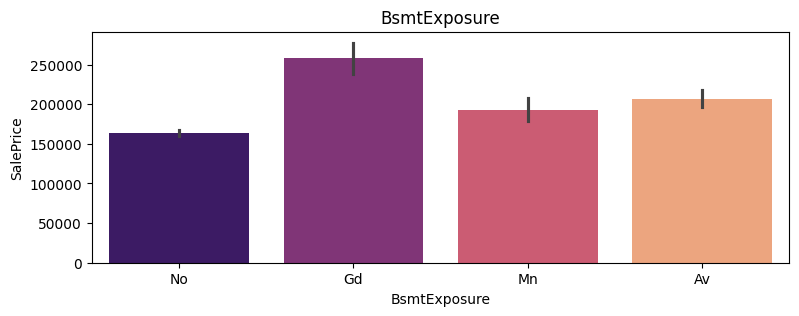

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


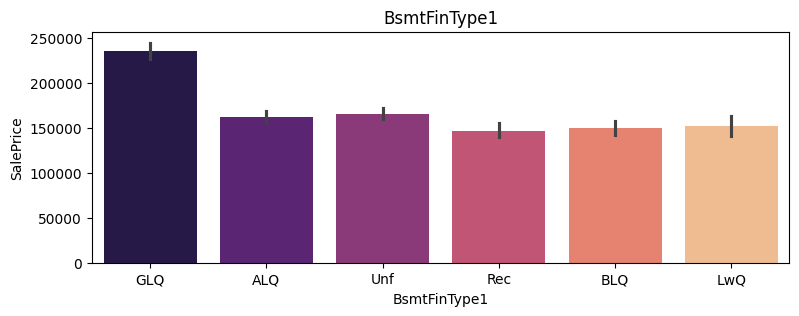

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


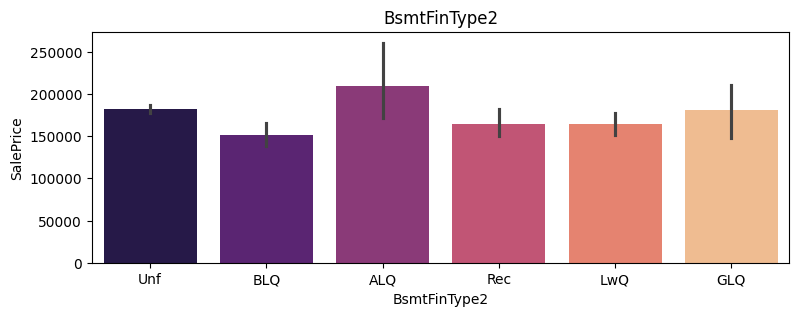

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


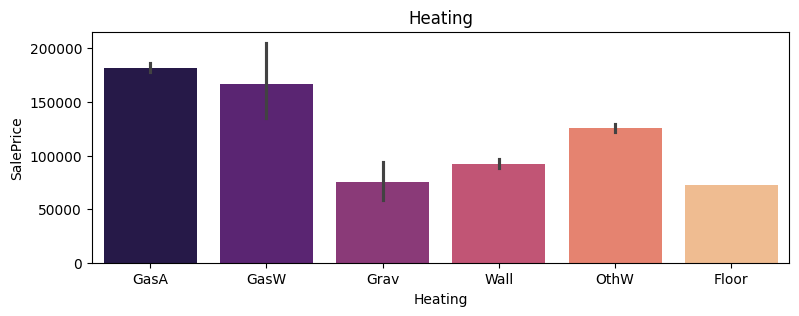

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


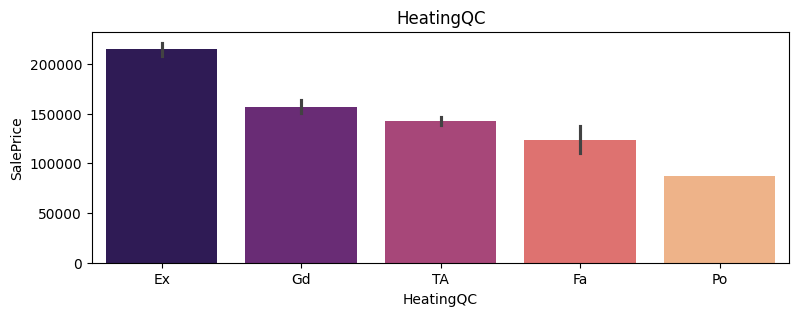

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


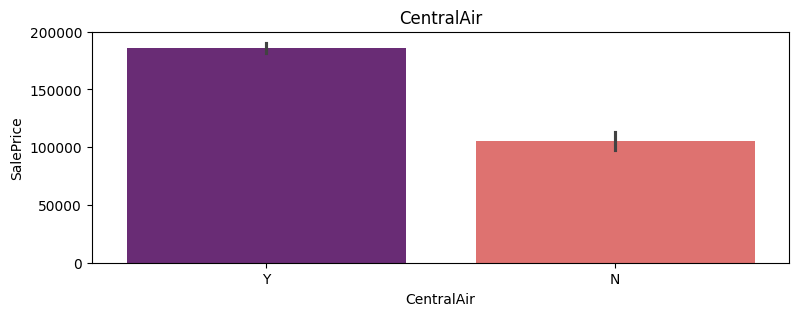

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


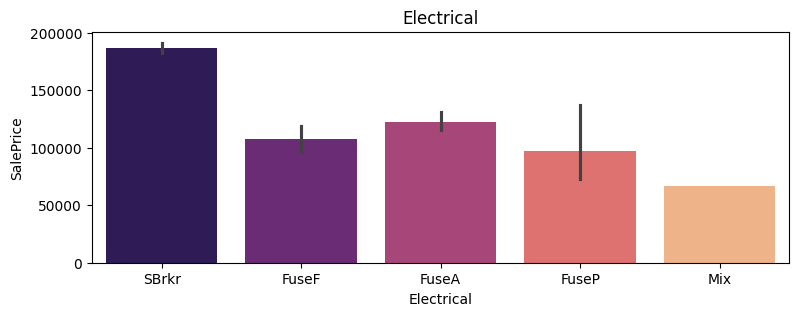

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


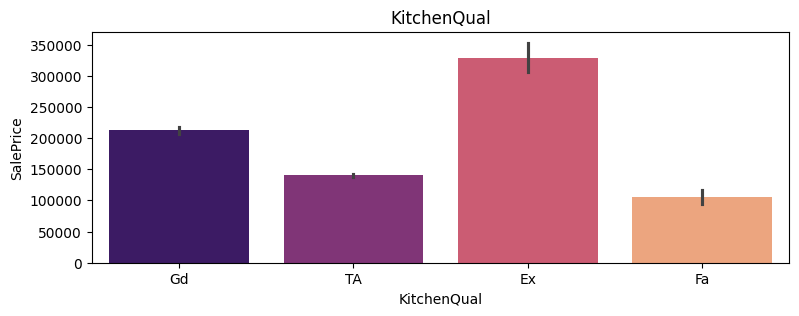

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


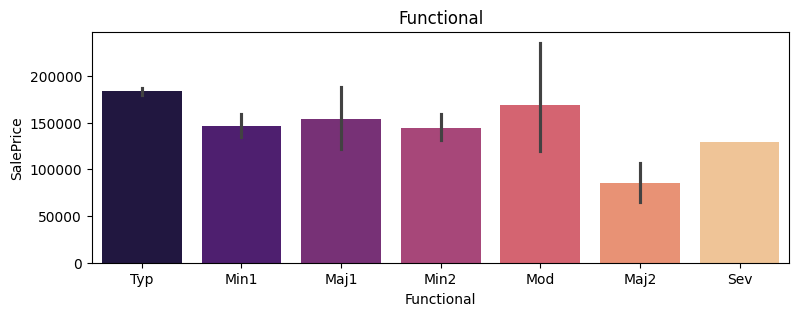

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


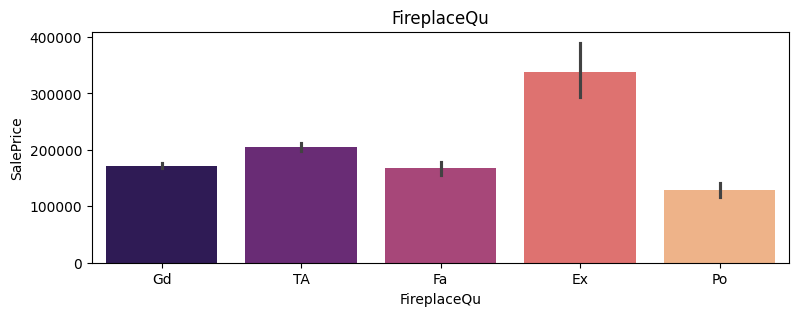

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


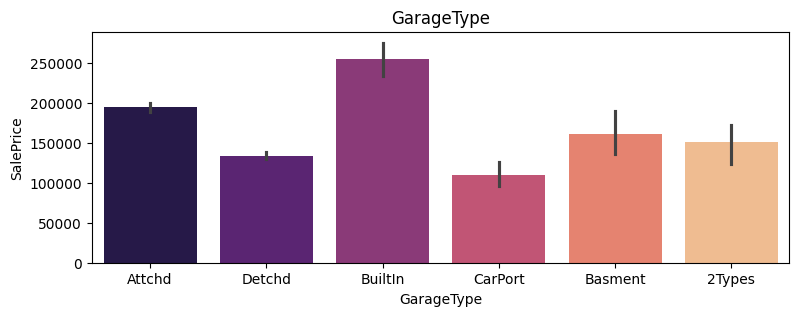

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


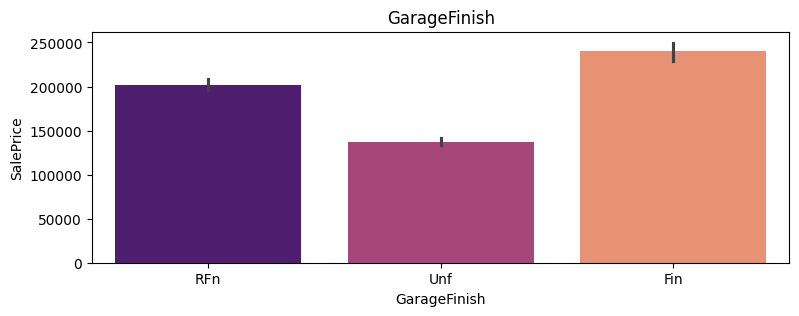

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


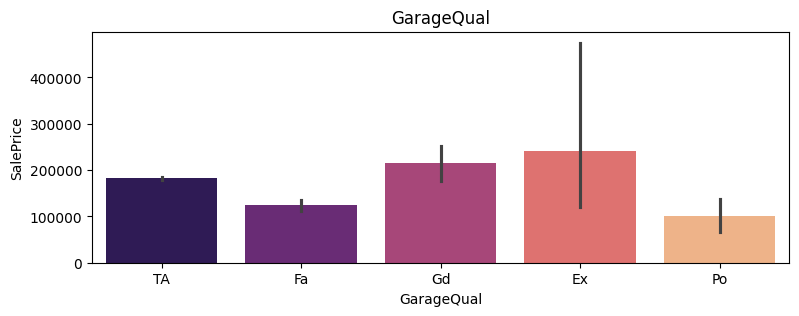

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


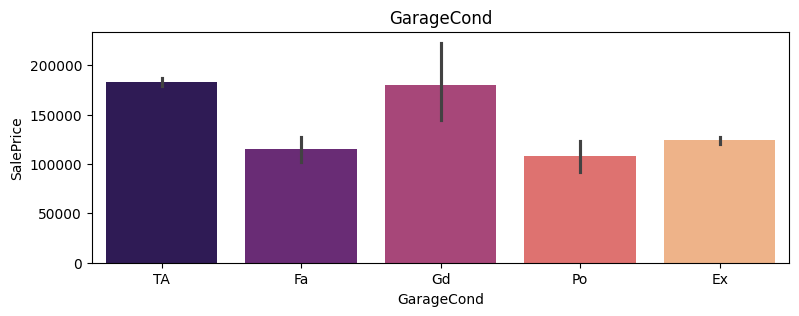

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


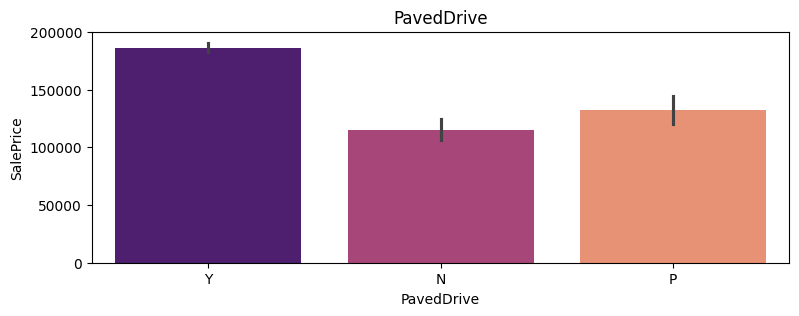

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


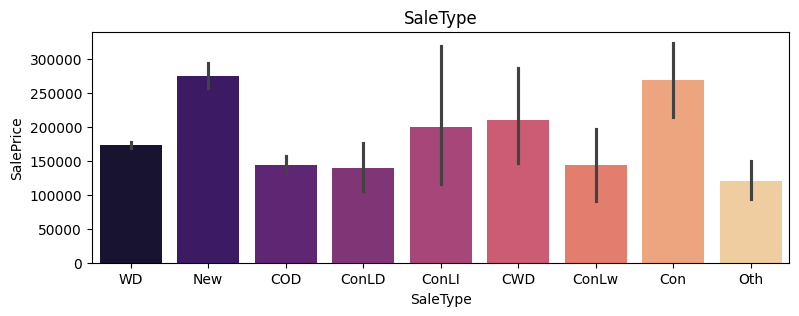

<ipython-input-16-79f5915f344e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')


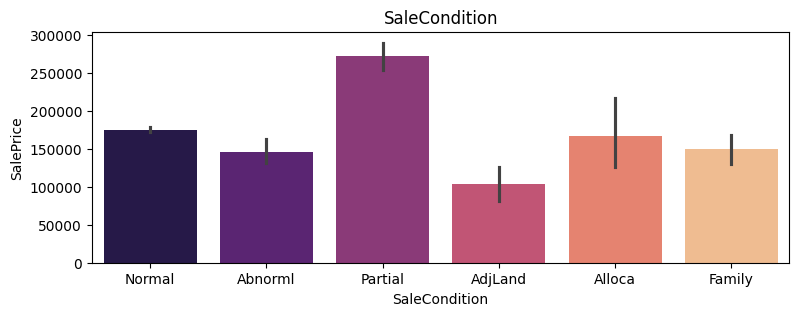

In [ ]:
for i in cat2:
  plt.figure(figsize=(9,3))
  sns.barplot(y='SalePrice',x=df2[i],data=df2,palette='magma')
  plt.title(i)
  plt.xlabel(i)
  plt.show()


* **Dropping less impactful columns**







In [ ]:
df.drop(columns=['ExterCond','BsmtFinSF1','GarageCond','Condition1','OverallCond','Exterior1st','LowQualFinSF'],axis=1,inplace=True)
df2.drop(columns=['ExterCond','BsmtFinSF1','GarageCond','Condition1','OverallCond','Exterior1st','LowQualFinSF'],axis=1,inplace=True)

In [ ]:
cols =df.columns
cols2 =df2.columns
cat = [i for i in cols if df[i].dtype=='object']
cat2 = [i for i in cols2 if df2[i].dtype=='object']
num = [i for i in cols if df[i].dtype== 'int64' or df[i].dtype=='float64']
num2 = [i for i in cols2 if df2[i].dtype== 'int64' or df2[i].dtype=='float64']

*   **Visualizing the relationship between Saleprice & Numerical variables**



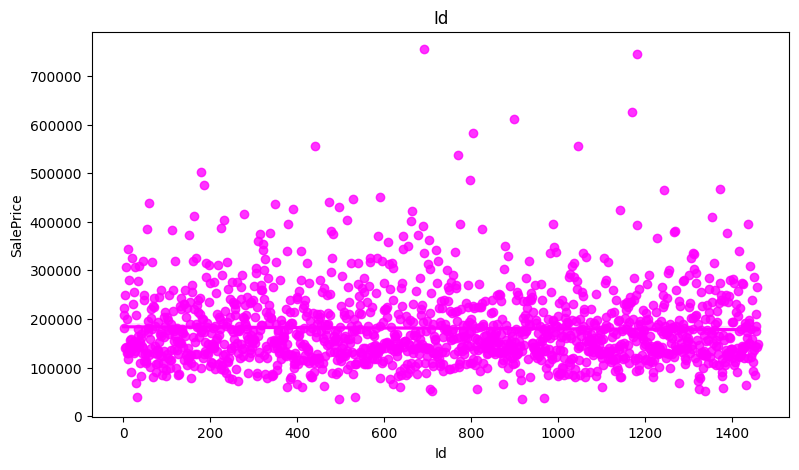

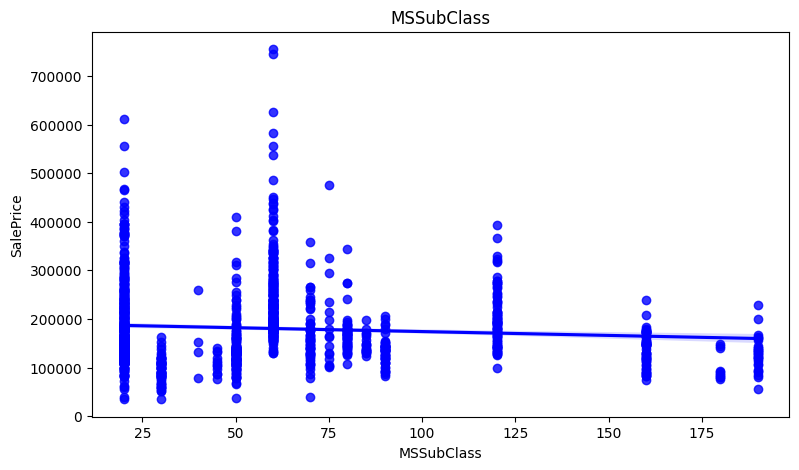

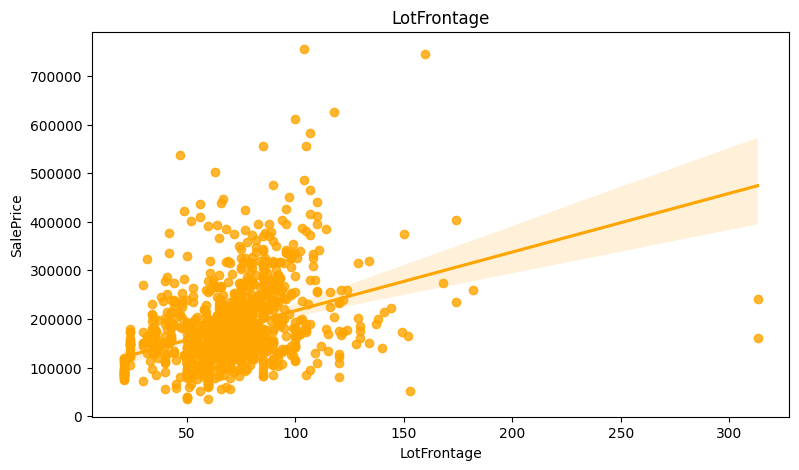

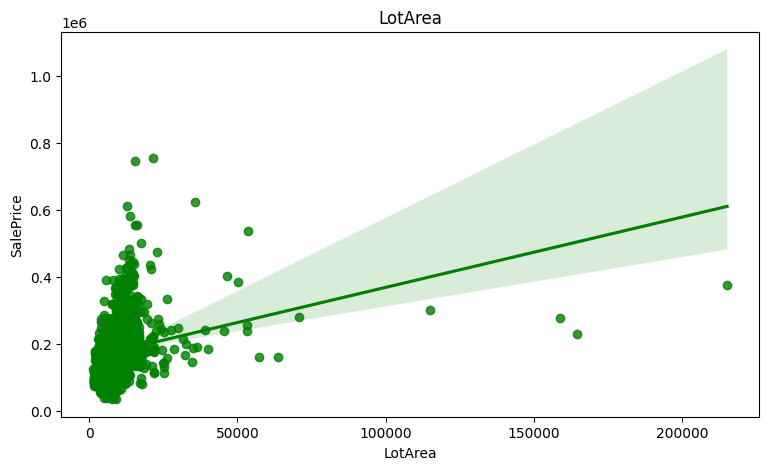

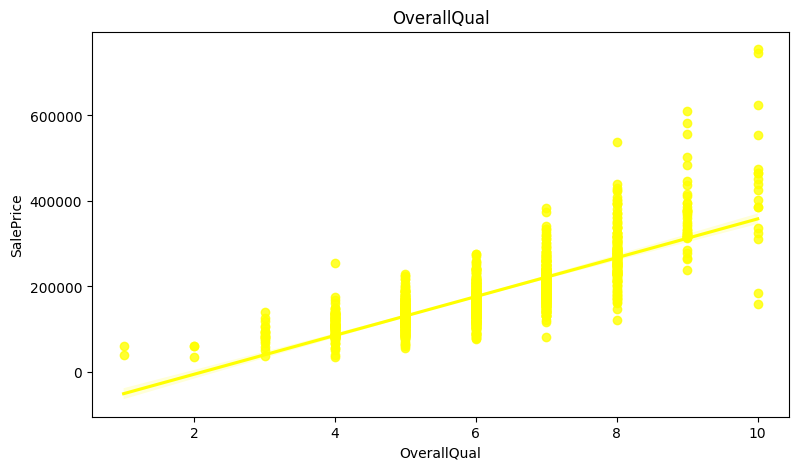

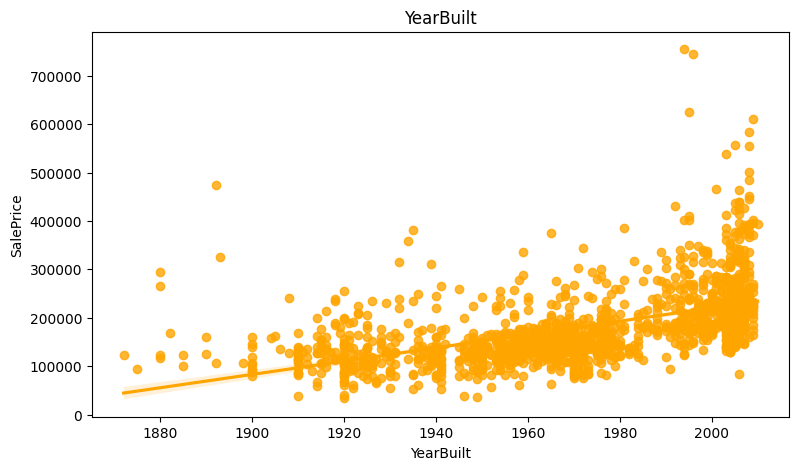

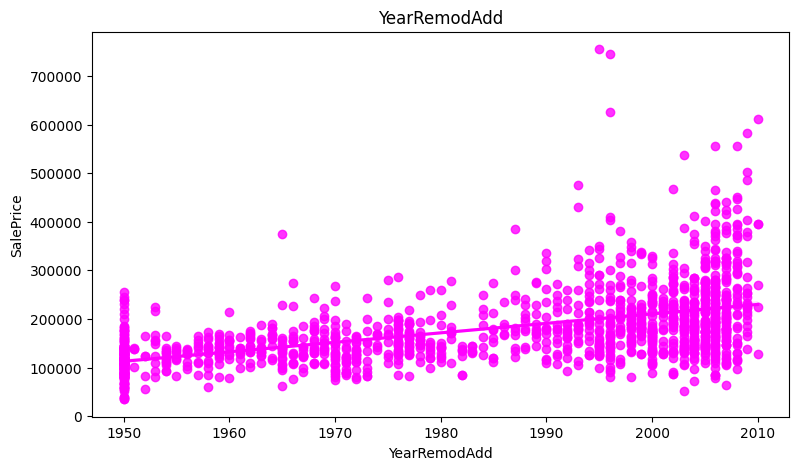

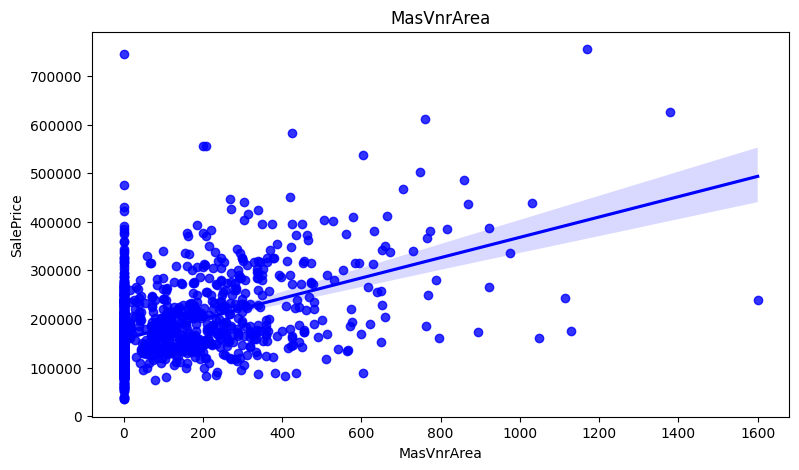

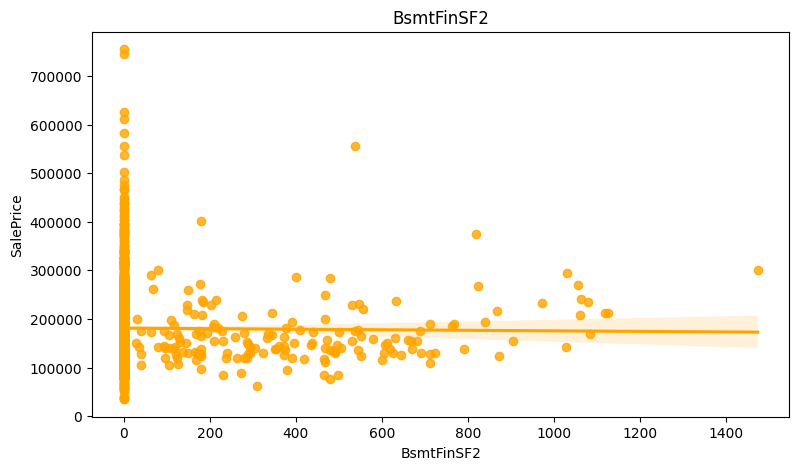

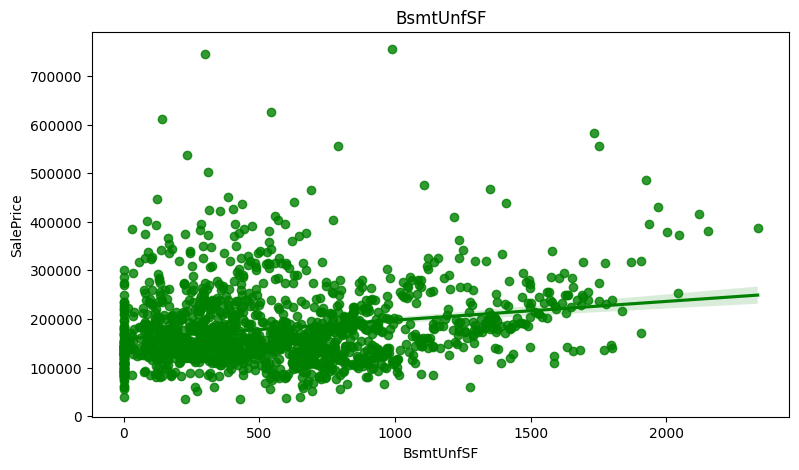

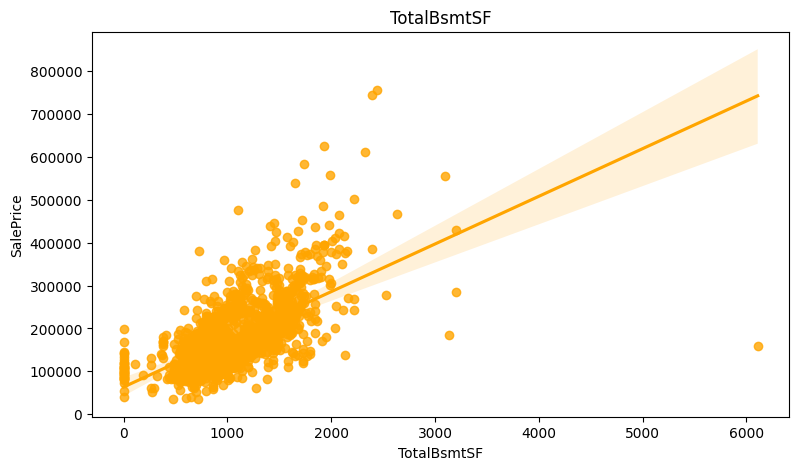

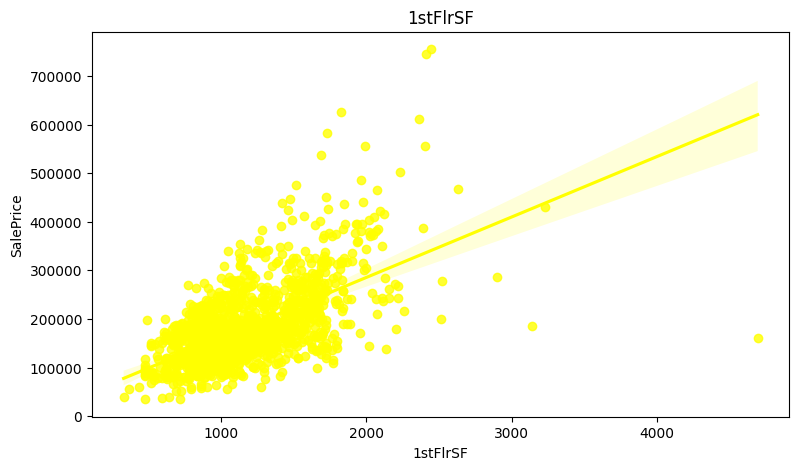

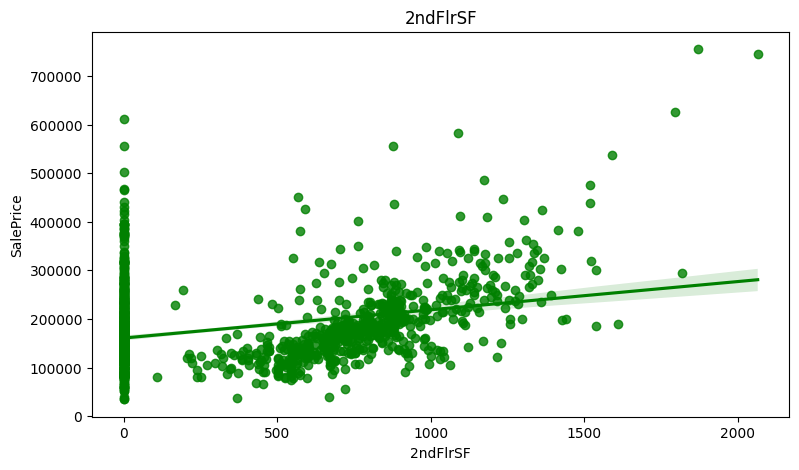

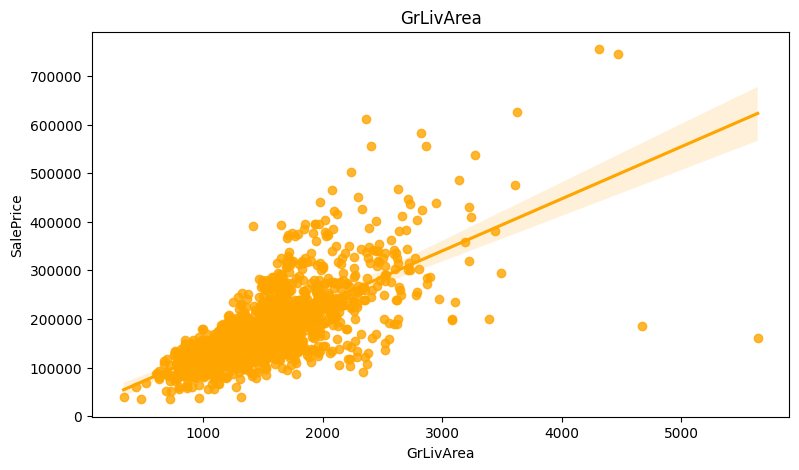

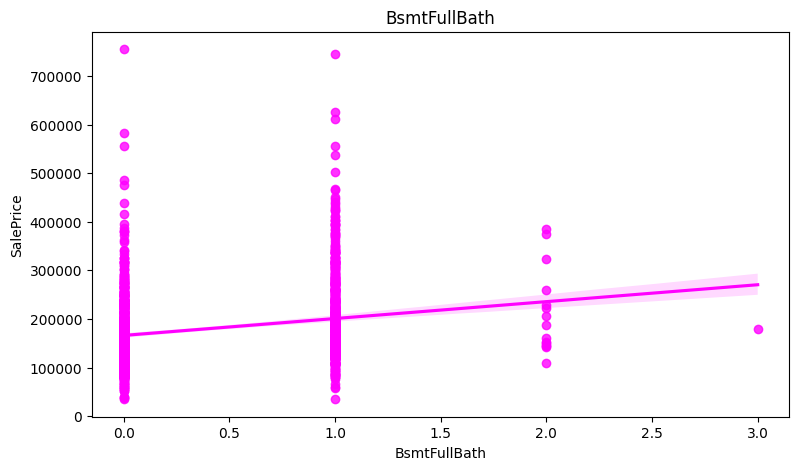

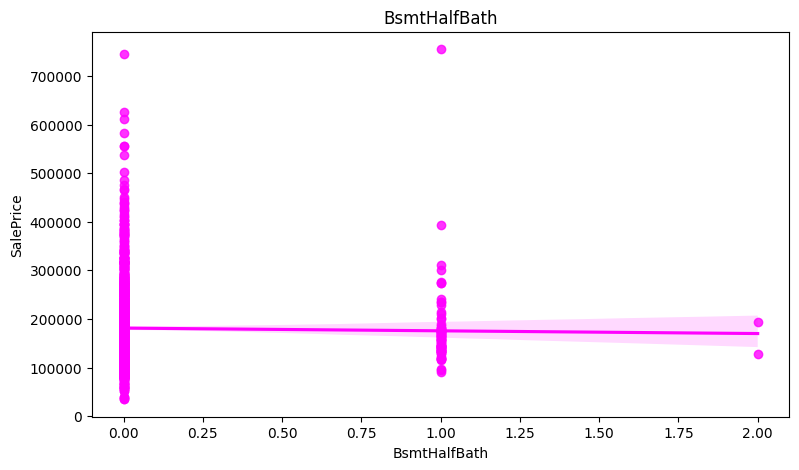

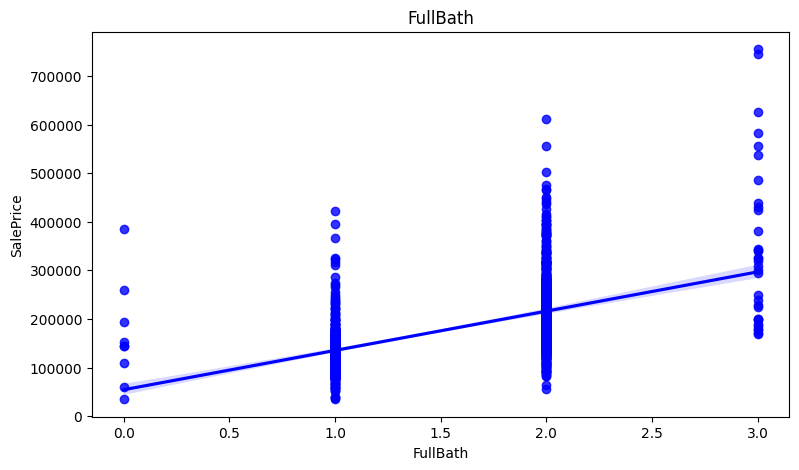

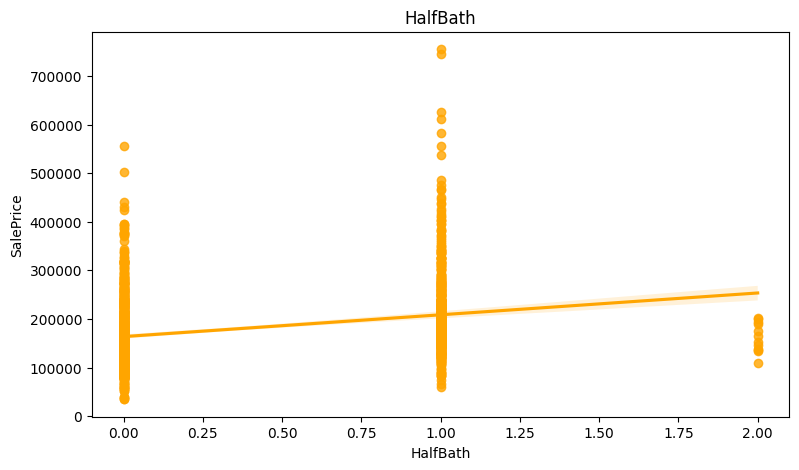

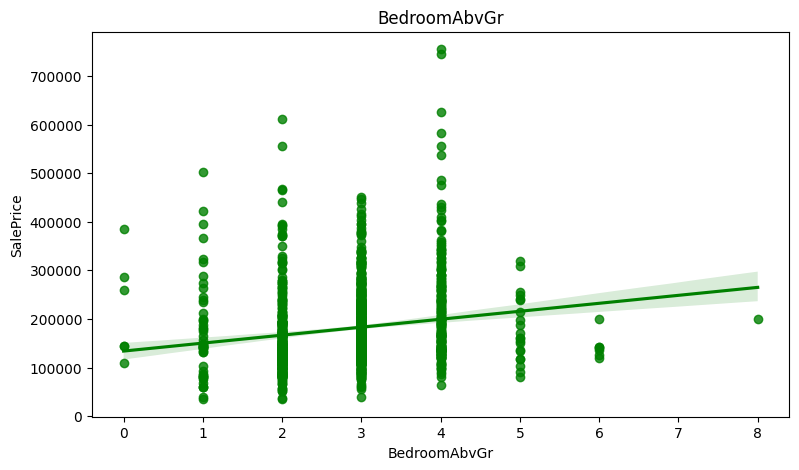

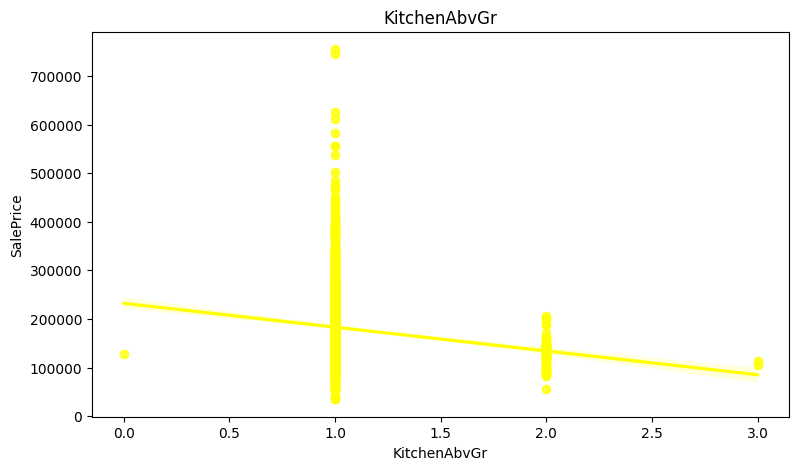

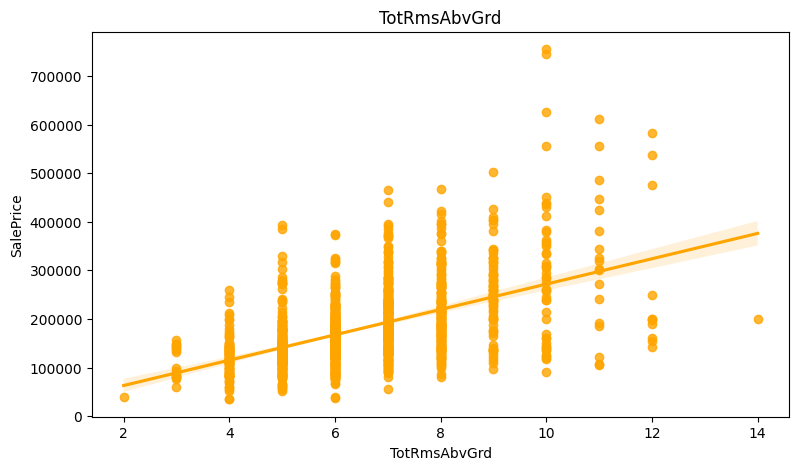

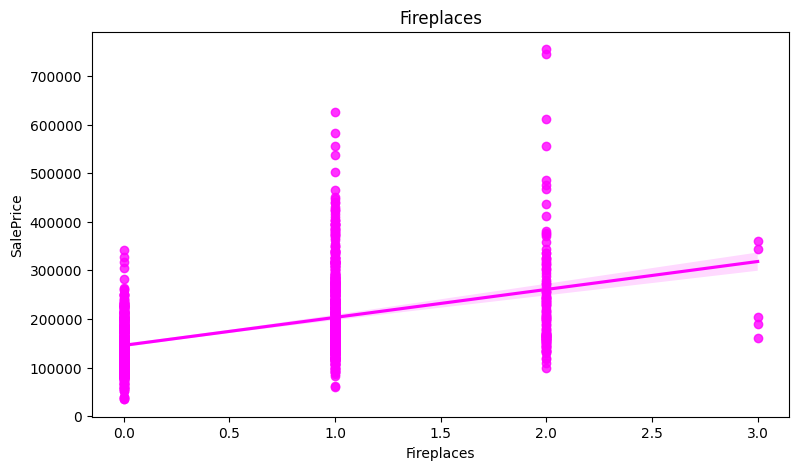

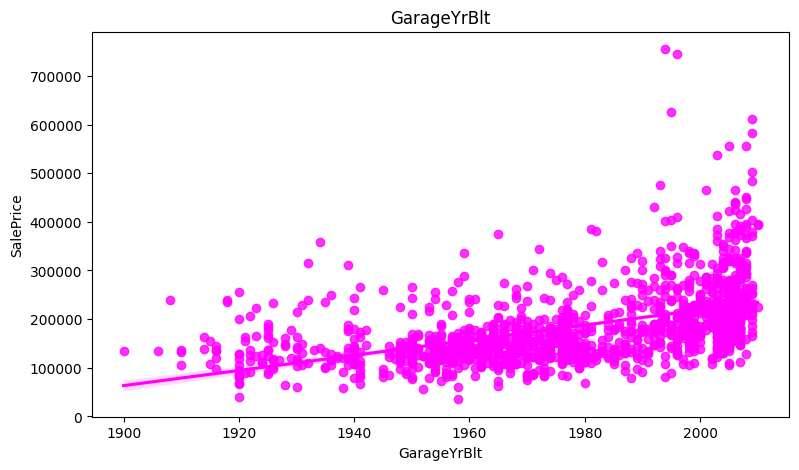

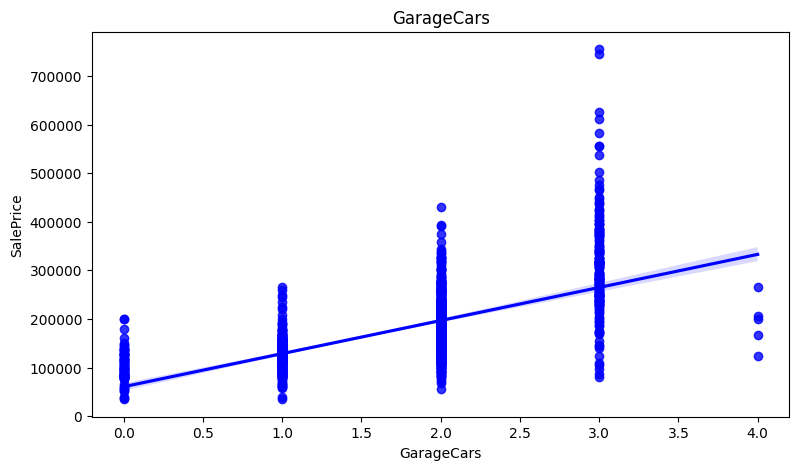

IndexError: list index out of range

<Figure size 900x500 with 0 Axes>

In [ ]:
j=0
colours = ['magenta','blue','orange','green','yellow','orange','magenta','blue','orange','green','orange','yellow','green','orange','magenta','magenta','blue','orange','green','yellow','orange','magenta','magenta','blue']
for i in num2:
  plt.figure(figsize=(9,5))
  sns.regplot(y='SalePrice',x=df2[i],data=df2,color=colours[j])
  j+=1
  plt.title(i)
  plt.xlabel(i)
  plt.show()

In [ ]:
categorical = pd.DataFrame(df2[cat2])
cat_col = categorical.columns
numeric = pd.DataFrame(df2[num])
num_col = numeric.columns
len(num_col),len(cat_col)

(34, 35)

* **Dropping rows with missing values**

In [ ]:
for i in num_col:
  if df[i].isnull().mean()*100 < 10 or df[i].isnull().mean()*100 < 10:
    df.dropna(subset=[i],inplace=True)
    df2.dropna(subset=[i],inplace=True)

* **Removing outilers using z-score method & capping**

In [ ]:
upper = df['LotFrontage'].mean()+ 3*df['LotFrontage'].std()
lower = df['LotFrontage'].mean()- 3*df['LotFrontage'].std()
upper = df2['LotFrontage'].mean()+ 3*df2['LotFrontage'].std()
lower = df2['LotFrontage'].mean()- 3*df2['LotFrontage'].std()
print(upper,lower)

143.46591378057332 -2.134959275666958


In [ ]:
df['LotFrontage'] = df['LotFrontage'].clip(lower,upper)
df2['LotFrontage'] = df2['LotFrontage'].clip(lower,upper)

In [ ]:
df['LotFrontage'][df['LotFrontage']>110]=120
df['LotFrontage'][(df['LotFrontage']<30) | (df['LotFrontage'] < lower)]=0
df2['LotFrontage'][df2['LotFrontage']>110]=120
df2['LotFrontage'][(df2['LotFrontage']<30) | (df['LotFrontage'] < lower)]=0

**Finding best filling method to fill nan values present in LotFrontage column**

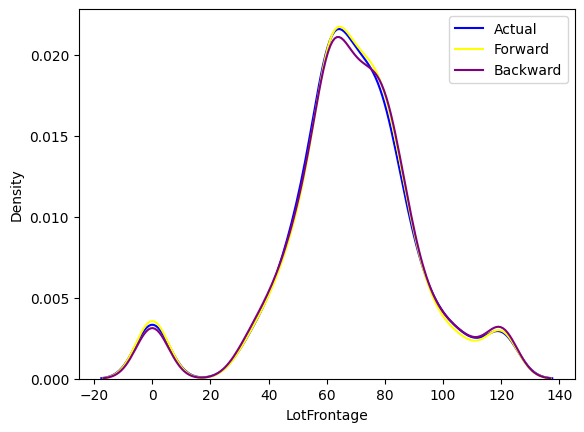

In [ ]:
forw = df['LotFrontage'].fillna(method='ffill',inplace=False)
back = df['LotFrontage'].fillna(method='bfill',inplace=False)
sns.kdeplot(df['LotFrontage'],color='blue')
sns.kdeplot(forw,color='yellow')
sns.kdeplot(back,color='purple')
plt.legend(['Actual','Forward','Backward'])
plt.show()

In [ ]:
df['LotFrontage'] = df['LotFrontage'].fillna(method='ffill',inplace=False)
df2['LotFrontage'] = df2['LotFrontage'].fillna(method='ffill',inplace=False)

In [ ]:
color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF',
              '#800000', '#008000', '#000080', '#808000', '#800080', '#008080',
              '#C00000', '#00C000', '#0000C0', '#C0C000', '#C000C0', '#00C0C0',
              '#400000', '#004000', '#000040', '#404000', '#400040', '#004040',
              '#804000', '#008040', '#000080', '#C00000', '#00C000', '#0000C0',
              '#C0C000', '#C000C0', '#00C0C0','#008000', '#000080', '#808000',
              '#400000', '#004000',]
sns.set_palette(color_list)
len(color_list)

38

In [ ]:
to_drop1 = []
for i in num_col :
  if (df[i].std() - df[i].quantile(0.75))>df[i].quantile(0.70) and (df2[i].std() - df2[i].quantile(0.75))>df2[i].quantile(0.70):
    to_drop1.append(i)

print(to_drop1)

['BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [ ]:
df.drop(columns=to_drop1,inplace=True)
df2.drop(columns=to_drop1,inplace=True)

In [ ]:
col1 =df.columns
col2 =df2.columns
cat = [i for i in col1 if df[i].dtype=='object']
cat2 = [i for i in col2 if df2[i].dtype=='object']
num = [i for i in col1 if df[i].dtype== 'int64' or df[i].dtype=='float64']
num2 = [i for i in col2 if df2[i].dtype== 'int64' or df2[i].dtype=='float64']

In [ ]:
categorical = pd.DataFrame(df2[cat2])
cat_col = categorical.columns
numeric = pd.DataFrame(df2[num])
num_col = numeric.columns
len(num_col),len(cat_col)

(27, 35)

In [ ]:
for i in num_col:
  upper = df[i].mean()+ 3*df[i].std()
  lower = df[i].mean()- 3*df[i].std()
  df[i] = df[i].clip(lower, upper)
  upper1 = df2[i].mean()+ 3*df2[i].std()
  lower1 = df2[i].mean()- 3*df2[i].std()
  df2[i] = df2[i].clip(lower1, upper1)

In [ ]:
numeric = pd.DataFrame(df2[num])
num_col = numeric.columns
num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
num1 = numeric.iloc[:,:8]
num_2 = numeric.iloc[:, 8:17]
num3 = numeric.iloc[:,17:25]
num4 = numeric.iloc[:,25:33]
num5 = numeric.iloc[:,33:]

* **Visualizing outliers present in numerical columns through boxplot**

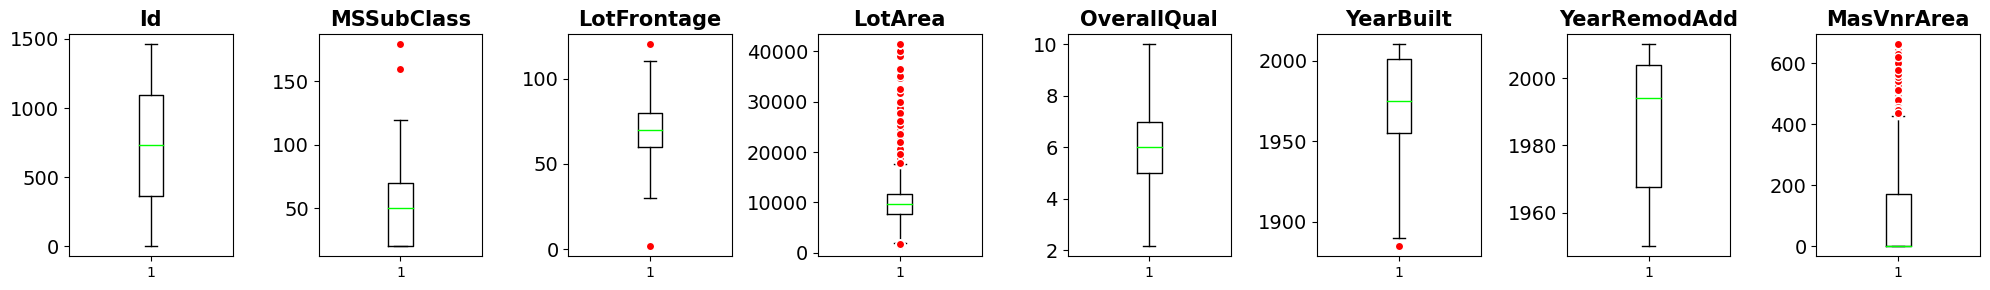

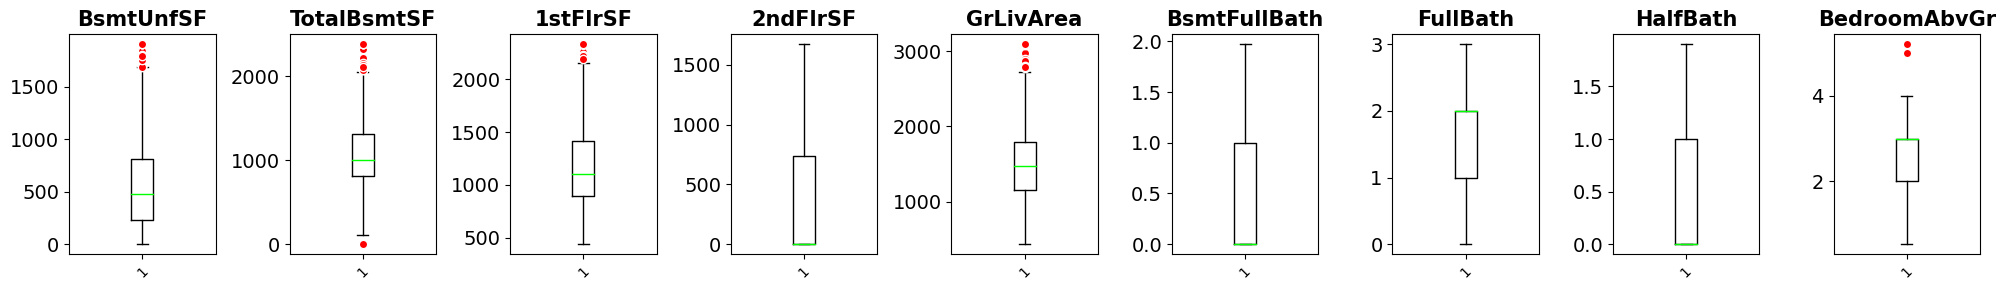

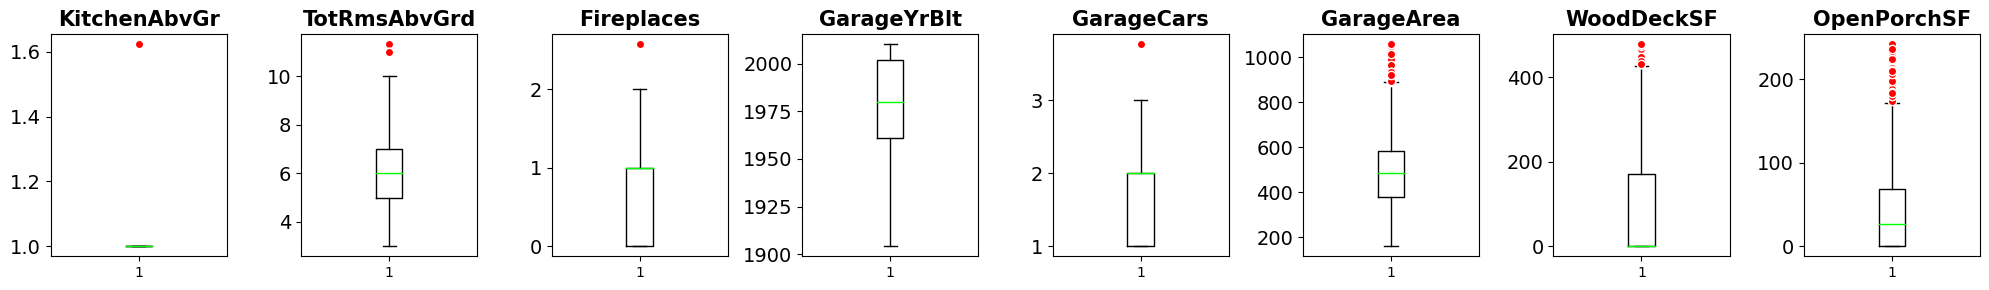

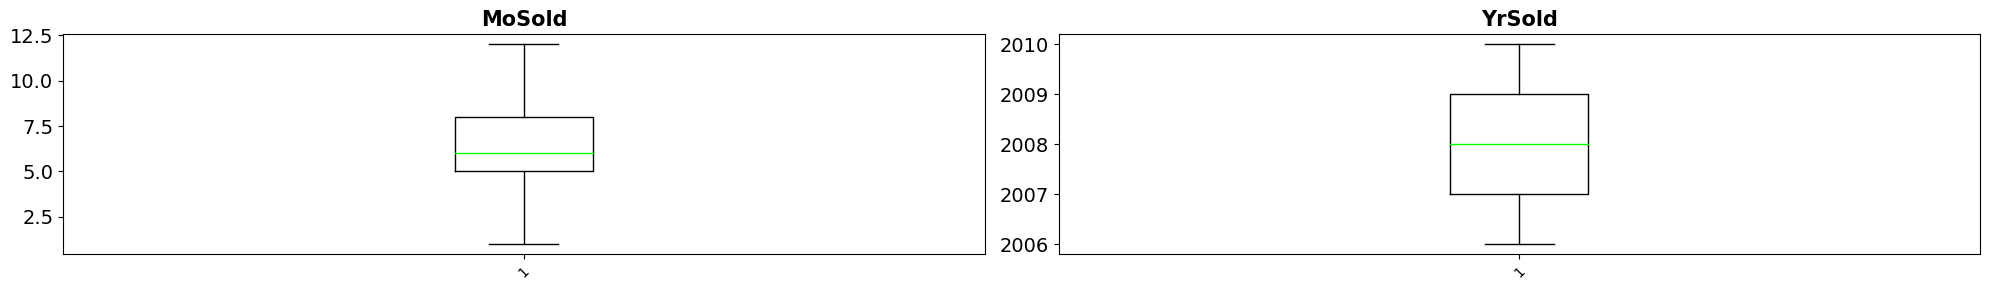

In [ ]:
red_circle = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')
fig , axes= plt.subplots(1, len(num1.columns), figsize=(20,3))
j=0
for i, ax in enumerate(axes.flatten()):
  ax.boxplot(num1.iloc[:,i:i+1],flierprops=red_circle)
  ax.set_title(num1.columns[i],fontsize=15,fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)
  j+=1
plt.tight_layout()
plt.show()

j=0
fig , axes= plt.subplots(1, len(num_2.columns), figsize=(20,3))
for i, ax in enumerate(axes.flatten()):
  ax.boxplot(num_2.iloc[:,i:i+1],flierprops=red_circle)
  ax.set_title(num_2.columns[i],fontsize=15,fontweight='bold')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.tick_params(axis='y', labelsize=14)
  j+=1
plt.tight_layout()
plt.show()


j=0
fig , axes= plt.subplots(1, len(num3.columns), figsize=(20,3))
for i, ax in enumerate(axes.flatten()):
  ax.boxplot(num3.iloc[:,i:i+1],flierprops=red_circle)
  ax.set_title(num3.columns[i],fontsize=15,fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)
  j+=1
plt.tight_layout()
plt.show()

j=0
fig , axes= plt.subplots(1, len(num4.columns), figsize=(20,3))
for i, ax in enumerate(axes.flatten()):
  ax.boxplot(num4.iloc[:,i:i+1],flierprops=red_circle)
  ax.set_title(num4.columns[i],fontsize=15,fontweight='bold')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.tick_params(axis='y', labelsize=14)
  j+=1
plt.tight_layout()
plt.show()

# Change the following line of code:
# fig , axes= plt.subplots(1, len(num5.columns), figsize=(20,3))

# To the following:
if len(num5.columns) > 0:
    fig , axes= plt.subplots(1, len(num5.columns), figsize=(20,3))
    j=0
    for i, ax in enumerate(axes.flatten()):
        ax.boxplot(num5.iloc[:,i:i+1],flierprops=red_circle)
        ax.set_title(num5.columns[i],fontsize=15,fontweight='bold')
        ax.tick_params(axis='y', labelsize=14)
        j+=1
    plt.tight_layout()
    plt.show()

In [ ]:
df['LotArea'][df['LotArea']>18000]=18000
df2['LotArea'][df2['LotArea']>18000]=18000
df['MasVnrArea'][df['MasVnrArea']>450]=450
df2['MasVnrArea'][df2['MasVnrArea']>450]=450
df['OpenPorchSF'][df['OpenPorchSF']>160]=160
df2['OpenPorchSF'][df2['OpenPorchSF']>160]=160

In [ ]:
numeric2 = pd.DataFrame(df2[num2])

In [ ]:
h1 =numeric2.iloc[:,:14].copy()
h2 =numeric2.iloc[:,14:].copy()

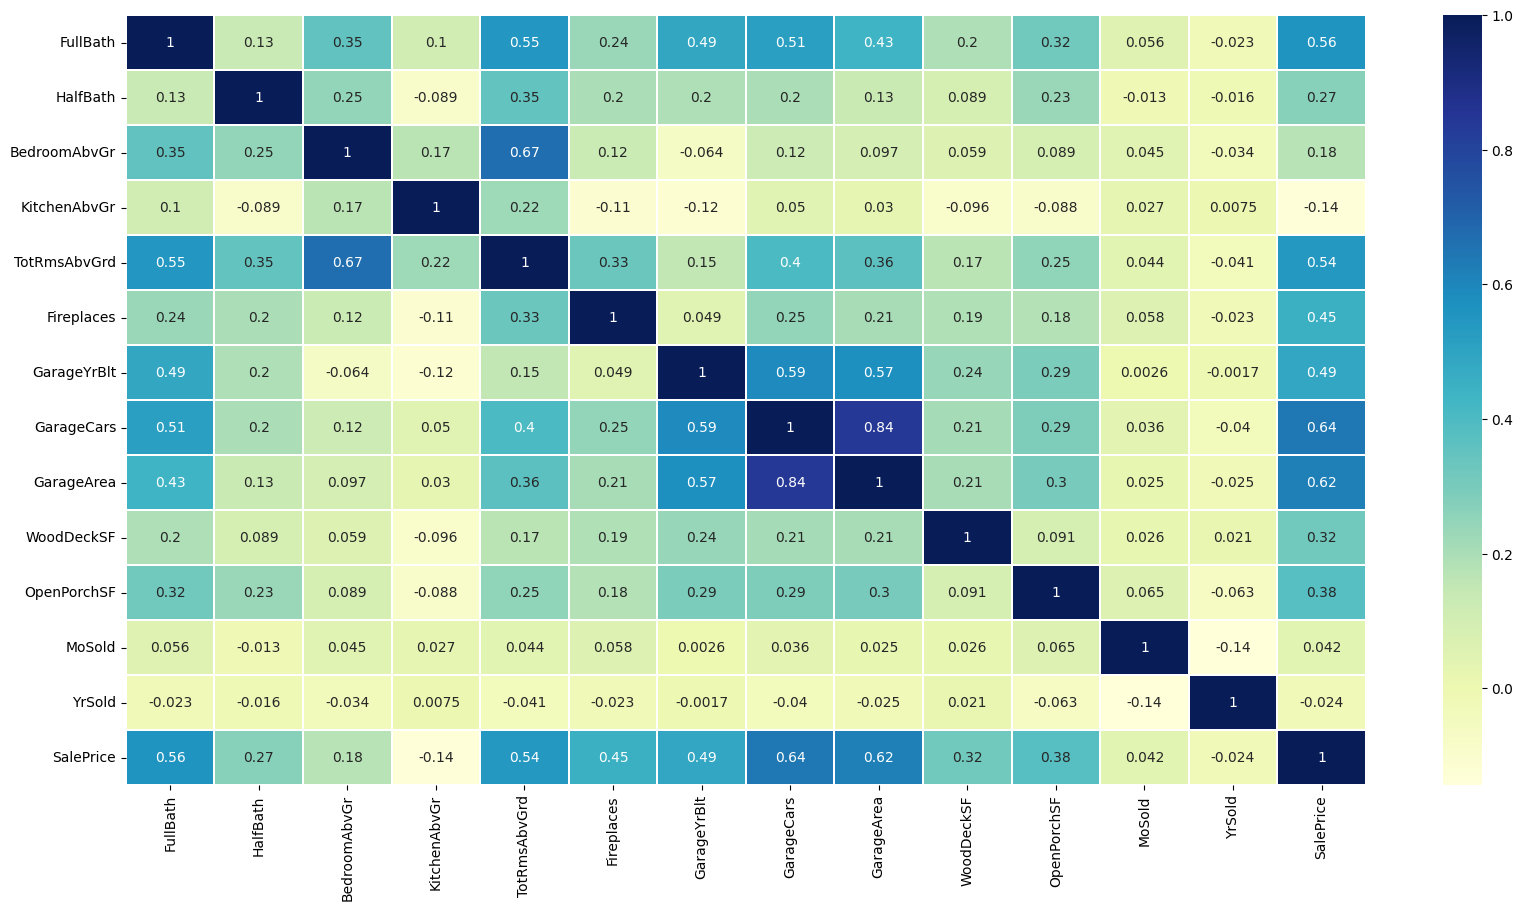

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(h2.corr(),annot=True,cmap='YlGnBu',lw=0.2)
plt.show()

In [ ]:
df.drop('GarageCars',axis=1,inplace=True)
df2.drop('GarageCars',axis=1,inplace=True)

In [ ]:
categorical = pd.get_dummies(categorical,drop_first=True)

In [ ]:
for i in cat_col:
  df[i] = df[i].astype('category')
  df[i] = df[i].cat.codes
  df2[i] = df2[i].astype('category')
  df2[i] = df2[i].cat.codes

In [ ]:
to_drop2 = []
for i in cat_col :
  if (df[i].std() - df[i].quantile(0.75))> df2[i].quantile(0.70) or df2[i].mean()<1:
    to_drop2.append(i)

print(to_drop2)

['Street', 'Utilities', 'LandSlope', 'BldgType', 'CentralAir']


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,1461,20.0,2,80.0,11622.0,1,3,3,0,4,...,2,730.0,3,2,140.0,0.0,6,2010,8,4
1,1462,20.0,3,81.0,14267.0,1,0,3,0,0,...,2,312.0,3,2,393.0,36.0,6,2010,8,4
2,1463,60.0,3,74.0,13830.0,1,0,3,0,4,...,0,482.0,3,2,212.0,34.0,3,2010,8,4
3,1464,60.0,3,78.0,9978.0,1,0,3,0,4,...,0,470.0,3,2,360.0,36.0,6,2010,8,4
4,1465,120.0,3,43.0,5005.0,1,0,1,0,4,...,1,506.0,3,2,0.0,82.0,1,2010,8,4


In [ ]:
df.drop(columns=to_drop2,inplace=True)
df2.drop(columns=to_drop2,inplace=True)

In [ ]:
cols =df.columns
cols2 =df2.columns
cat = [i for i in cols if df[i].dtype=='object']
cat2 = [i for i in cols2 if df2[i].dtype=='object']
num = [i for i in cols if df[i].dtype== 'int64' or df[i].dtype=='float64']
num2 = [i for i in cols2 if df2[i].dtype== 'int64' or df2[i].dtype=='float64']

In [ ]:
categorical = pd.DataFrame(df2[cat2])
cat_col = categorical.columns
numeric = pd.DataFrame(df2[num])
num_col = numeric.columns
len(num_col),len(cat_col)

(26, 0)

In [ ]:
df.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df.shape , df2.shape

((1365, 56), (1371, 57))

In [ ]:
sample = df2.iloc[1365:,:56]
df2.drop(index=sample.index,axis=0)
sampled = pd.DataFrame(sample)
df_new = pd.concat([df,sampled],axis=0)

In [ ]:
df2.shape,df_new.shape

((1371, 57), (1371, 56))

In [ ]:
test_train = pd.concat([df2,df_new],axis=0)

In [ ]:
train = test_train.iloc[:1371,:]
test = test_train.iloc[1371:,:]
test.drop('SalePrice',axis=1,inplace=True)

In [ ]:
X_train = train.drop('SalePrice',axis=1)
y_train = train['SalePrice']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
imputer = SimpleImputer(strategy='most_frequent')
pipeline = Pipeline([("imputer", imputer), ("model", LinearRegression())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('model', LinearRegression())])

In [ ]:
from sklearn.metrics import classification_report, mean_squared_error
y_pred_p = pipeline.predict(test)
print('Linear Regression >>>>>')
print('Accuracy of training data: ',pipeline.score(X_train,y_train))
print('Accuracy of testing data : ',pipeline.score(test,y_pred_p))

Linear Regression >>>>>
Accuracy of training data:  0.8561605464950135
Accuracy of testing data :  1.0


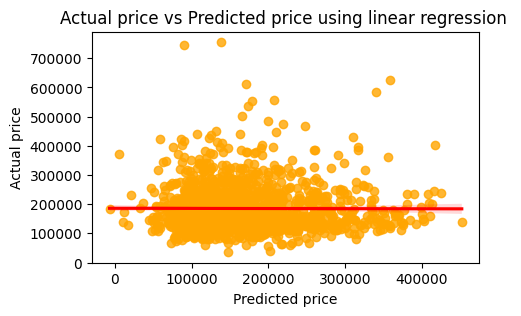

In [ ]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_pred_p,y=y_train,color='orange',line_kws=dict(color="r"))
plt.title('Actual price vs Predicted price using linear regression ')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.show()

In [ ]:
from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(test)
print('XGBRegressor >>>>>')
print('Accuracy of training data: ',round(classifier.score(X_train,y_train),3))
print('Accuracy of testing data : ',classifier.score(test,y_pred))

XGBRegressor >>>>>
Accuracy of training data:  1.0
Accuracy of testing data :  1.0


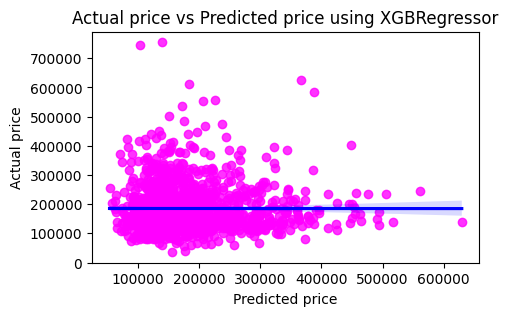

In [ ]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_pred,y=y_train,color='magenta',line_kws=dict(color="b"))
plt.title('Actual price vs Predicted price using XGBRegressor')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.show()

In [ ]:
parameter_grid ={
    'n_estimators': [500,1100],
    'min_child_weight': [1,2],
    'max_depth': [1,3],
    'learning_rate': [0.01,0.1],
    'booster': ['gbtree'],
    'base_score': [0.25,0.50]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
regressor = XGBRegressor()
random_cv = RandomizedSearchCV(estimator=regressor,param_distributions = parameter_grid,
                               cv=5,n_iter=50,n_jobs=4,
                               verbose =5, return_train_score = True)

In [ ]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5],
                                        'booster': ['gbtree'],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [1, 3],
                                        'min_child_weight': [1, 2],
                                        'n_estimators': [500, 1100]},
                   return_train_score=True, verbose=5)

In [ ]:
rand_y = random_cv.predict(test)
print('XGBRegressor integrated with Randomized Search CV>>>>>')
print('Accuracy on training data >> ',round(random_cv.score(X_train,y_train),3))
print('Accuracy on training data >> ',random_cv.score(test,rand_y))

XGBRegressor integrated with Randomized Search CV>>>>>
Accuracy on training data >>  0.998
Accuracy on training data >>  1.0


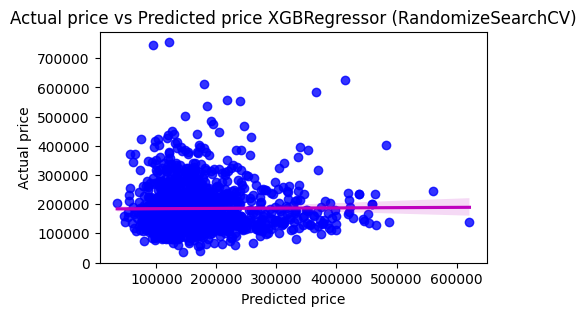

In [ ]:
plt.figure(figsize=(5,3))
sns.regplot(x=rand_y,y=y_train,color='blue',line_kws=dict(color="m"))
plt.title('Actual price vs Predicted price XGBRegressor (RandomizeSearchCV)')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.show()